In [1]:
import pandas as pd

In [3]:
links = pd.read_csv(r"C:\Users\saiki\Downloads\movie_data\links.csv")

In [4]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [5]:
mov = pd.read_csv(r"C:\Users\saiki\Downloads\movie_data\movies.csv")

## What is the shape of "movies.csv"?


In [6]:
mov.shape

(9742, 3)

In [7]:
rat = pd.read_csv(r"C:\Users\saiki\Downloads\movie_data\ratings.csv")

## What is the shape of "ratings.csv"?

In [8]:
rat.shape

(100836, 4)

In [14]:
rat

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


## How many unique "userId" are available in "ratings.csv"?

In [115]:
rat['userId'].nunique()

610

In [12]:
tags = pd.read_csv(r"C:\Users\saiki\Downloads\movie_data\tags.csv")

In [13]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


## Which movie has recieved maximum number of user ratings?


In [17]:
mov.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
rat.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [20]:
user_rat = pd.merge(mov,rat,on = 'movieId')

In [21]:
user_rat

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [30]:
user_rat['title'].value_counts().idxmax()

'Forrest Gump (1994)'

In [28]:
user_rat.groupby('title')['rating'].count().max()

329

## Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [32]:
tag_movie = pd.merge(tags,mov,on="movieId")

In [33]:
tag_movie

,userId,movieId,tag,timestamp,title,genres
0,2,60756,funny,1445714994,Step Brothers (2008),Comedy
1,2,60756,Highly quotable,1445714996,Step Brothers (2008),Comedy
2,2,60756,will ferrell,1445714992,Step Brothers (2008),Comedy
3,2,89774,Boxing story,1445715207,Warrior (2011),Drama
4,2,89774,MMA,1445715200,Warrior (2011),Drama
...,...,...,...,...,...,...
3678,606,7382,for katie,1171234019,I'm Not Scared (Io non ho paura) (2003),Drama|Mystery|Thriller
3679,606,7936,austere,1173392334,Shame (Skammen) (1968),Drama|War
3680,610,3265,gun fu,1493843984,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller
3681,610,3265,heroic bloodshed,1493843978,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller


In [118]:
tag_movie[tag_movie['title'] == 'Matrix, The (1999)'][['title','tag']]

,title,tag
815,"Matrix, The (1999)",martial arts
816,"Matrix, The (1999)",sci-fi
1646,"Matrix, The (1999)",alternate universe
2794,"Matrix, The (1999)",philosophy
2795,"Matrix, The (1999)",post apocalyptic


## What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [36]:
user_rat

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [39]:
round(user_rat[user_rat['title'] == 'Terminator 2: Judgment Day (1991)']['rating'].mean(),2)

3.97

## How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [43]:
dis_r = user_rat[user_rat['title'] == 'Fight Club (1999)']

In [44]:
import seaborn as sns

<Axes: xlabel='rating', ylabel='Density'>

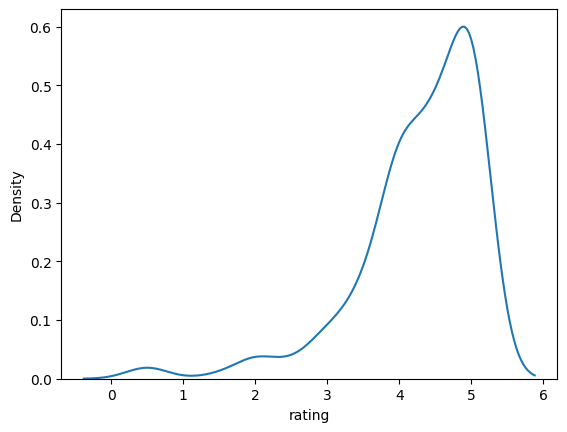

In [45]:
sns.kdeplot(data = dis_r,x = "rating")

## 🟢 IMPORTANT NOTE 1 🟢
**Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.**

**Mandatory Operations:**
* 1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
* 2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
* 3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

* Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

In [59]:
count = rat.groupby('movieId')['rating'].count().reset_index()

In [60]:
mean = rat.groupby('movieId')['rating'].mean().reset_index()

In [64]:
grouped_df = pd.merge(count,mean,on = 'movieId')

In [65]:
grouped_df

,movieId,rating_x,rating_y
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [66]:
mov

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [67]:
merge_df = pd.merge(mov,grouped_df,how = "inner",on = 'movieId')

In [68]:
merge_df

,movieId,title,genres,rating_x,rating_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [69]:
filterd_df = merge_df[merge_df['rating_x']>50]

In [70]:
filterd_df

,movieId,title,genres,rating_x,rating_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


## Which movie is the most popular based on  average user ratings?


In [77]:
filterd_df['rating_y'].max()

4.429022082018927

In [75]:
filterd_df[filterd_df['rating_y'] == 4.429022082018927]

,movieId,title,genres,rating_x,rating_y
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


## Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [93]:
filterd_df.sort_values(by = "rating_x",ascending=False).head()

,movieId,title,genres,rating_x,rating_y
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


## Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [98]:
filterd_df[filterd_df['genres'].str.contains('Sci-Fi')].sort_values(by = "rating_x",ascending=False).head(3)

,movieId,title,genres,rating_x,rating_y
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000


## 🟢 IMPORTANT NOTE 2 🟢
* **You already have a subset of data containing only those movies which has recieved more than 50 user ratings.**

* **Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.**


**`filterd_df`** contains the more than 50 user ratings

In [162]:
links.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


## Mention the movieId of the movie which has the highest IMDB rating

In [159]:
me_df = pd.merge(filterd_df,links,on='movieId')
me_df

,movieId,title,genres,rating_x,rating_y,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [99]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [157]:
me_df['imdbId'].max()

2278388

In [165]:
me_df[me_df['imdbId'] == 2278388]['movieId'].values[0]

109374

## Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [151]:
me_df

,movieId,title,genres,rating_x,rating_y,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [153]:
me_df[me_df['genres'].str.contains("Sci-Fi")]['imdbId'].max()

2015381

In [164]:
me_df[me_df['imdbId'] == 2015381]['movieId'].values[0]

112852

In [119]:
import requests
from bs4 import BeautifulSoup

In [124]:
imdb_url = 'http://www.imdb.com'

In [127]:
page = requests.get(imdb_url,headers = {'User-Agent':'Mozilla/5.0'})

In [128]:
page

<Response [200]>

In [122]:
soup = BeautifulSoup(page.text)

In [141]:
content = soup.find_all('div',class_ = "frontpage")